# Pantheon+ Supernovae Data Pipeline
# Reproducible access, cleaning, and basic analysis
# for cosmological applications


In [ ]:
!pip install astroquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astroquery.vizier import Vizier


In [ ]:
Vizier.columns = ['*']
Vizier.ROW_LIMIT = -1


In [ ]:
import pandas as pd

url = "https://github.com/dscolnic/Pantheon/raw/master/lcparam_full_long.txt"

pantheon = pd.read_csv(
    url,
    sep=r"\s+",
    header=None,
    comment="#"
)

pantheon.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pantheon.columns = [
    'SN_name',     # identificador
    'z_helio',     # redshift heliocêntrico
    'z_cmb',       # redshift no referencial CMB
    'dz',          # correção
    'mB',          # magnitude aparente
    'dmb',         # erro da magnitude
    'col6', 'col7', 'col8', 'col9',
    'col10','col11','col12','col13',
    'col14','col15','col16','col17'
]

pantheon.head()


,SN_name,z_helio,z_cmb,dz,mB,dmb,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sn = pantheon[['SN_name', 'z_cmb', 'mB', 'dmb']].copy()

sn.rename(columns={
    'z_cmb': 'redshift',
    'mB': 'magnitude',
    'dmb': 'mag_error'
}, inplace=True)

sn.head()


,SN_name,redshift,magnitude,mag_error
0,03D1au,0.50309,22.93445,0.12605
1,03D1ax,0.49480,22.88020,0.11765
2,03D1co,0.67767,24.03770,0.20560
3,03D1ew,0.86650,24.34685,0.17385
4,03D1fq,0.79857,24.36050,0.17435


In [ ]:
sn = sn.dropna()

sn.describe()


,redshift,magnitude,mag_error
count,1048.000000,1048.000000,1048.000000
mean,0.322314,20.747108,0.141770
std,0.285966,2.647864,0.031442
min,0.010120,13.907450,0.085400
25%,0.131682,19.607525,0.120150
50%,0.248555,21.159450,0.137475
75%,0.422712,22.479637,0.155800
max,2.260000,26.877000,0.450850


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "font.size": 11,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--"
})


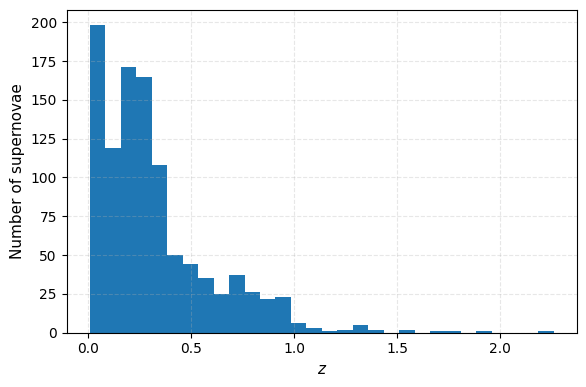

In [ ]:
# Figure 1: Distribution of redshift

plt.figure()
plt.hist(sn["redshift"], bins=30)
plt.xlabel(r"$z$")
plt.ylabel("Number of supernovae")
plt.tight_layout()
plt.show()


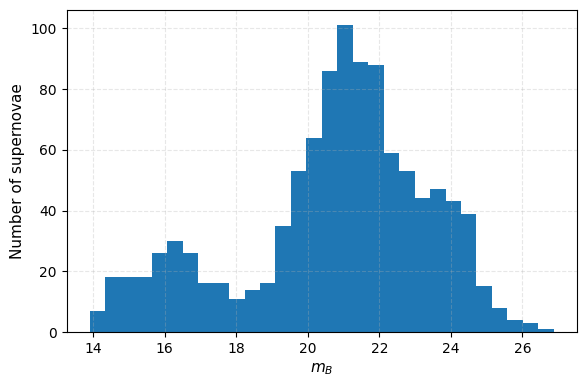

In [ ]:
# Figure 2: Distribution of apparent magnitude

plt.figure()
plt.hist(sn["magnitude"], bins=30)
plt.xlabel(r"$m_B$")
plt.ylabel("Number of supernovae")
plt.tight_layout()
plt.show()


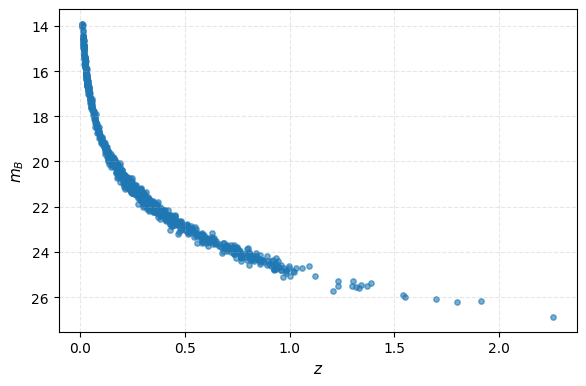

In [ ]:
# Figure 3: Apparent magnitude versus redshift

plt.figure()
plt.scatter(sn["redshift"], sn["magnitude"], s=15, alpha=0.6)
plt.xlabel(r"$z$")
plt.ylabel(r"$m_B$")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


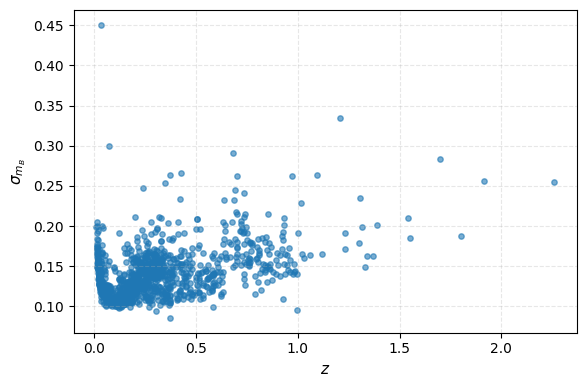

In [ ]:
# Figure 4: Photometric uncertainty versus redshift

plt.figure()
plt.scatter(sn["redshift"], sn["mag_error"], s=15, alpha=0.6)
plt.xlabel(r"$z$")
plt.ylabel(r"$\sigma_{m_B}$")
plt.tight_layout()
plt.show()


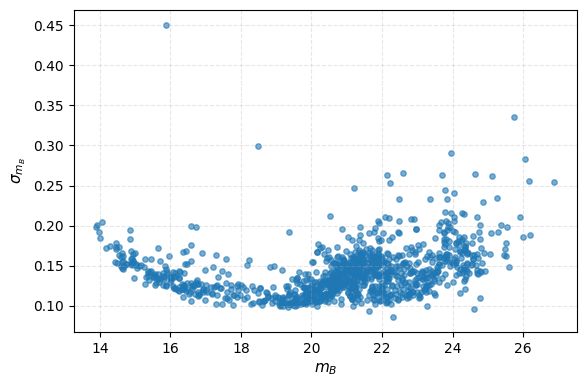

In [ ]:
# Figure 5: Photometric uncertainty versus apparent magnitude

plt.figure()
plt.scatter(sn["magnitude"], sn["mag_error"], s=15, alpha=0.6)
plt.xlabel(r"$m_B$")
plt.ylabel(r"$\sigma_{m_B}$")
plt.tight_layout()
plt.show()


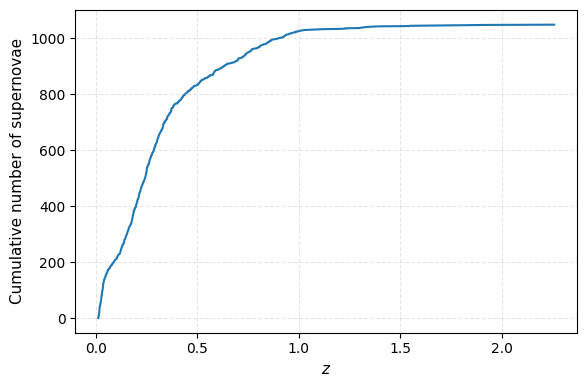

In [ ]:
# Figure 6: Cumulative number of supernovae as a function of redshift

sn_sorted = sn.sort_values("redshift")

plt.figure()
plt.plot(sn_sorted["redshift"], range(1, len(sn_sorted) + 1))
plt.xlabel(r"$z$")
plt.ylabel("Cumulative number of supernovae")
plt.tight_layout()
plt.show()
